In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/raw_data/PRAICP-1004-RainfallTS.zip"
extract_path = "/content/drive/MyDrive/raw_data/projectdata"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted Files:", os.listdir(extract_path))

Extracted Files: ['Data']


In [ ]:
import pandas as pd

# Define the folder where files are stored
folder_path = "/content/drive/MyDrive/raw_data/projectdata/Data"


In [ ]:
import os

folder_path = "/content/drive/MyDrive/raw_data/projectdata/Data"
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Ensure it's a text file
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            print(f"Contents of {filename}:\n{file.read()}\n")

Contents of metadata-rainfall-monthly-maximum-daily-total.txt:
# Metadata for Rainfall - Monthly Maximum Daily Total
---
Identifier: 'ac7bfe41-02c5-4161-8d05-8a1125e798ab'
Name: 'rainfall-monthly-maximum-daily-total'
Title: 'Rainfall - Monthly Maximum Daily Total'
Description: 'The highest daily total rainfall for the month recorded at the Changi
  Climate Station.'
Topics:
  - 'Environment'
Keywords:
  - 'Climate'
  - 'NEA'
  - 'Precipitation'
  - 'Rainfall'
  - 'Weather'
Publisher:
  Name: 'National Environment Agency'
  Admin 1:
    Name: 'Ong Chin Hong'
    Department: 'CCRS'
    Email: 'ong_chin_hong@nea.gov.sg'
  Admin 2:
    Name: 'Ang Chieng Hai'
    Department: 'CCRS'
    Email: 'ang_chieng_hai@nea.gov.sg'
Sources:
  - 'National Environment Agency'
License: 'https://data.gov.sg/open-data-licence'
Frequency: 'Monthly'
Coverage: '1982-01-01 to 2020-06-30'
Last Updated: '2020-07-21T02:19:03.470061'
Resources:
  -
    Identifier: 'df4d391e-6950-4fc6-80cd-c9b9ef6354fe'
    Title: '

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load CSV files
df1 = pd.read_csv('/content/drive/MyDrive/raw_data/projectdata/Data/rainfall-monthly-highest-daily-total.csv')
df2 = pd.read_csv('/content/drive/MyDrive/raw_data/projectdata/Data/rainfall-monthly-number-of-rain-days.csv')
df3 = pd.read_csv('/content/drive/MyDrive/raw_data/projectdata/Data/rainfall-monthly-total.csv')

# Merge DataFrames on the 'month' column
df= df1.merge(df2, on='month', how='outer').merge(df3, on='month', how='outer')

# Display combined data
print(df.head())

     month  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
0  1982-01                       36.5                10           107.1
1  1982-02                        9.4                 5            27.8
2  1982-03                       61.7                11           160.8
3  1982-04                       45.1                14           157.0
4  1982-05                       33.0                10           102.2


**Data preprocessing**

In [ ]:
print(df.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      462 non-null    object 
 1   maximum_rainfall_in_a_day  462 non-null    float64
 2   no_of_rainy_days           462 non-null    int64  
 3   total_rainfall             462 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.6+ KB
None


In [ ]:
print(df.describe())  # Get statistical summary


       maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
count                 462.000000        462.000000      462.000000
mean                   52.358225         13.958874      176.236580
std                    35.685122          4.947494      113.296793
min                     0.200000          1.000000        0.200000
25%                    30.625000         11.000000       89.025000
50%                    43.450000         14.000000      158.450000
75%                    63.150000         18.000000      237.950000
max                   216.200000         27.000000      765.900000


In [ ]:
print(df.head())  # Preview first few rows

     month  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
0  1982-01                       36.5                10           107.1
1  1982-02                        9.4                 5            27.8
2  1982-03                       61.7                11           160.8
3  1982-04                       45.1                14           157.0
4  1982-05                       33.0                10           102.2


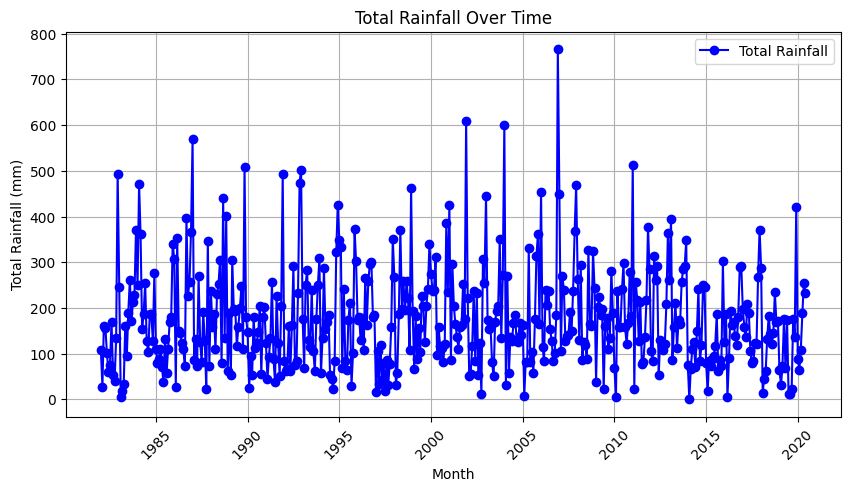

In [ ]:


# Assuming you have loaded your data into a DataFrame named df

# Convert 'month' to datetime format
df['month'] = pd.to_datetime(df['month'])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['month'], df['total_rainfall'], marker='o', linestyle='-', color='b', label="Total Rainfall")
plt.xlabel("Month")
plt.ylabel("Total Rainfall (mm)")
plt.title("Total Rainfall Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 month                        0
maximum_rainfall_in_a_day    0
no_of_rainy_days             0
total_rainfall               0
dtype: int64


In [ ]:
# Fill missing values with median (if any)
df.fillna(df.median(), inplace=True)
print(df.head())

       month  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall
0 1982-01-01                       36.5                10           107.1
1 1982-02-01                        9.4                 5            27.8
2 1982-03-01                       61.7                11           160.8
3 1982-04-01                       45.1                14           157.0
4 1982-05-01                       33.0                10           102.2


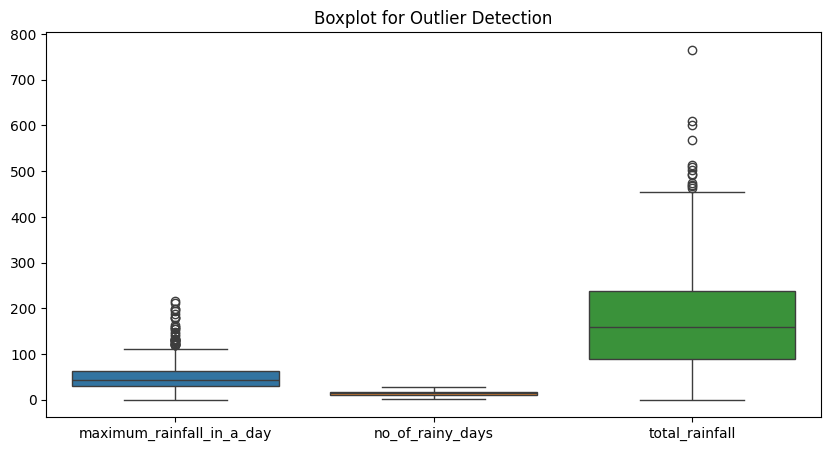

In [ ]:
# Detect outliers using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.show()


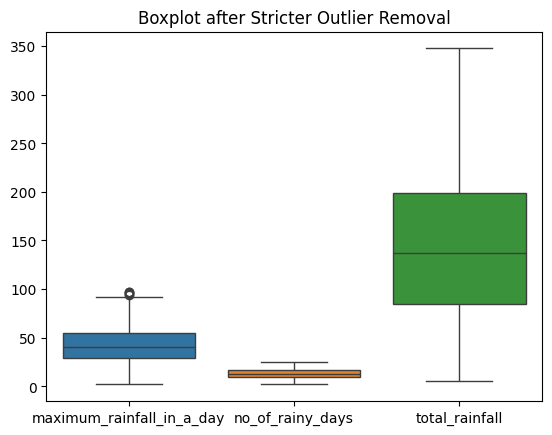

In [ ]:

# Function to remove outliers using a stricter IQR threshold
def remove_outliers(df, column, threshold=1.2):  # Default is 1.2 instead of 1.5
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - threshold * IQR) & (df[column] <= Q3 + threshold * IQR)]

# Apply stricter outlier removal
columns = ["maximum_rainfall_in_a_day", "no_of_rainy_days", "total_rainfall"]
for col in columns:
    df = remove_outliers(df, col)

# Plot boxplot after stricter outlier removal
sns.boxplot(data=df)
plt.title("Boxplot after Stricter Outlier Removal")
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert 'month' to datetime (rename to 'date' if it represents full dates)
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')  # If format is 'YYYY-MM'

# Extract features (only extract 'day' if data is daily)
df['Year'] = df['month'].dt.year
df['Month'] = df['month'].dt.month  # Keep only Month & Year if data is monthly

# Fill missing values
df.ffill(inplace=True)

# Create lag feature (if data is monthly, shift by 1 month)
df['Rainfall_Lag1'] = df['total_rainfall'].shift(1)  # Previous month's rainfall

# Normalize data
scaler = MinMaxScaler()
df[['total_rainfall']] = scaler.fit_transform(df[['total_rainfall']])

# Display first few rows
print(df.head())


       month  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall  \
0 1982-01-01                       36.5                10        0.296784   
1 1982-02-01                        9.4                 5        0.064912   
2 1982-03-01                       61.7                11        0.453801   
3 1982-04-01                       45.1                14        0.442690   
4 1982-05-01                       33.0                10        0.282456   

   Year  Month  Rainfall_Lag1  
0  1982      1            NaN  
1  1982      2          107.1  
2  1982      3           27.8  
3  1982      4          160.8  
4  1982      5          157.0  


In [ ]:
df.dropna(inplace=True)  # Remove first row with NaN

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


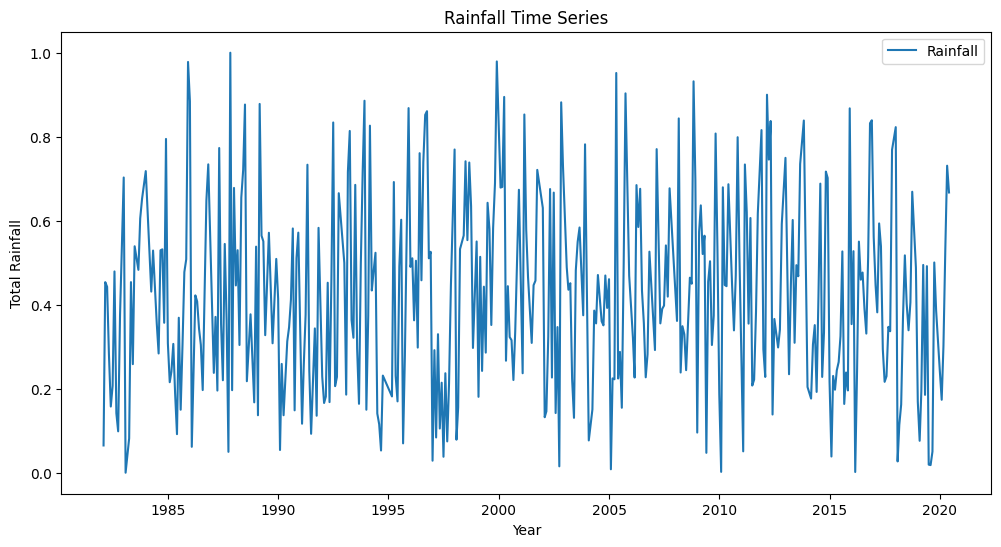

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['month'], df['total_rainfall'], label="Rainfall")
plt.xlabel("Year")
plt.ylabel("Total Rainfall")
plt.title("Rainfall Time Series")
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is NOT stationary")

adf_test(df['total_rainfall'])


ADF Statistic: -17.306676892029497
p-value: 5.58644771555552e-30
Data is stationary


In [ ]:
# Prepare Data for LSTM
scaler = MinMaxScaler()
df['scaled_rainfall'] = scaler.fit_transform(df[['total_rainfall']])

X, y = [], []
for i in range(12, len(df)):
    X.append(df['scaled_rainfall'].iloc[i-12:i].values)
    y.append(df['scaled_rainfall'].iloc[i])

X, y = np.array(X), np.array(y)


In [ ]:
# Split into Train & Test
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [ ]:
# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(12,1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.1226 - val_loss: 0.0505
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0552 - val_loss: 0.0516
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0588 - val_loss: 0.0497
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0577 - val_loss: 0.0499
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0541 - val_loss: 0.0497
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0660 - val_loss: 0.0519
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0602 - val_loss: 0.0521
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0544 - val_loss: 0.0492
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0545 - val_loss: 0.0491
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0549 - val_loss: 0.0510
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0562 - val_loss: 0.0542
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0

In [ ]:
# Forecast
preds = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step


In [ ]:
# Reverse Scaling
preds = scaler.inverse_transform(preds)

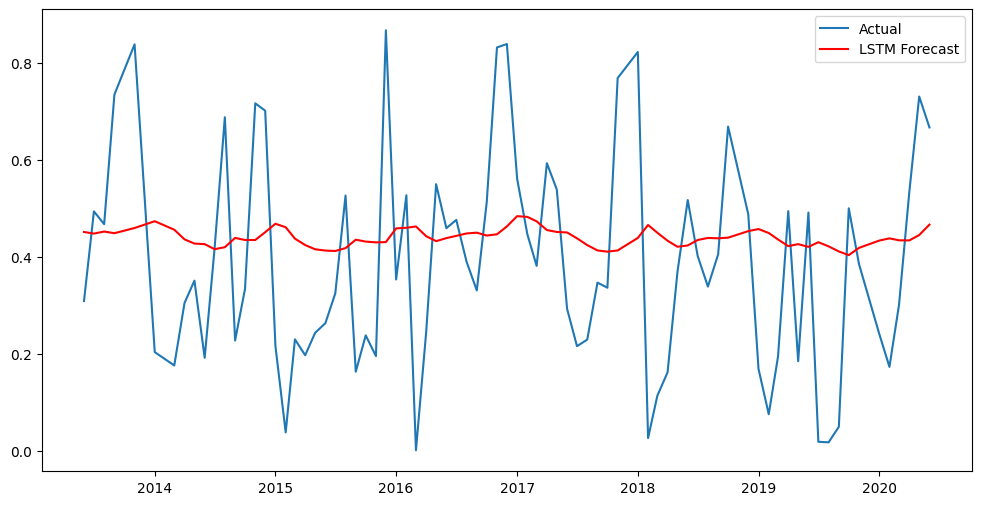

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['month'][train_size+12:], df['total_rainfall'][train_size+12:], label="Actual")
plt.plot(df['month'][train_size+12:], preds, label="LSTM Forecast", color='red')
plt.legend()
plt.show()


In [ ]:
# Reverse Scaling
preds_rescaled = scaler.inverse_transform(preds.reshape(-1,1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_rescaled, preds_rescaled)
mse = mean_squared_error(y_test_rescaled, preds_rescaled)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.19013116406833175
Mean Squared Error (MSE): 0.05163514871297208
Root Mean Squared Error (RMSE): 0.22723368745186548
